In [14]:
import pacmap
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys
import pathlib
import os 
# Set seed for reproducibility
SEED = 87


# Setup path
project_root = pathlib.Path().resolve().parent
sys.path.append(str(project_root / 'src'))
import util


In [ ]:

# Read data
# train_df, test_df = util.load_data('../data/train.csv', '../data/test.csv')
train_data, test_data = util.load_data('../data/train.csv', '../data/test.csv')
X = train_data.drop(['rainfall', 'id'], axis=1)
y = train_data['rainfall']

display(X)
display(y)

# Fit pacmap
embedding = pacmap.PaCMAP(n_components=3)
X_transformed = embedding.fit_transform(X)

# 3D scatter plot
df = pd.DataFrame(X_transformed)
df["y"] = y
display(df)

fig = px.scatter_3d(df, x=0, y=1, z=2, color=y)
fig.show()


Train shape: (2190, 13), Test shape: (730, 12)


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...,...
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9
2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0


0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int64

Note: `n_components != 2` have not been thoroughly tested.


,0,1,2,3,y
0,16.136141,-5.406450,-0.908848,-1.626312,1
1,16.296219,-6.005732,-0.908953,-1.518291,1
2,14.533446,-4.880018,0.159667,-3.055706,1
3,16.255911,-5.337072,-0.842039,-1.684779,1
4,14.409738,-5.347158,0.857187,-3.726647,0
...,...,...,...,...,...
2185,-16.546715,-7.016013,3.754333,-1.408420,1
2186,-16.768139,-6.007377,3.756793,-1.142399,1
2187,-16.137613,-6.306798,3.700421,-1.630217,1
2188,-16.532974,-7.110049,3.762101,-1.444883,1


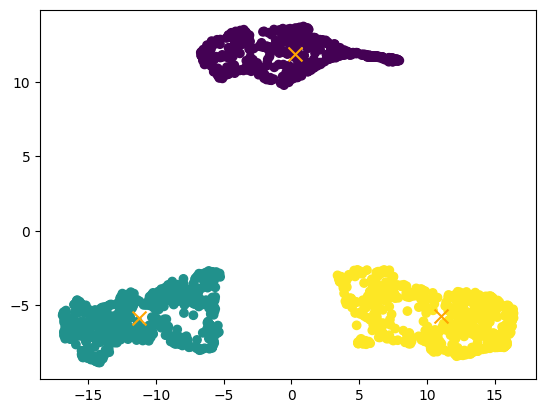

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,cluster_id
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,2
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,2
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,2
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,2
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1,1


In [16]:

# Do K-means clustering in latent space
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X_transformed)

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='orange')
plt.show()

# Add cluster id back to train data
train_data['cluster_id'] = kmeans.labels_
display(train_data)

train_data.to_csv('train_data_cluster_id.csv', index=False)

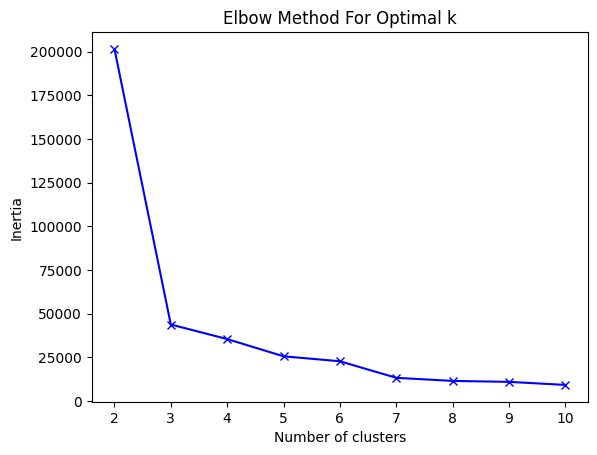

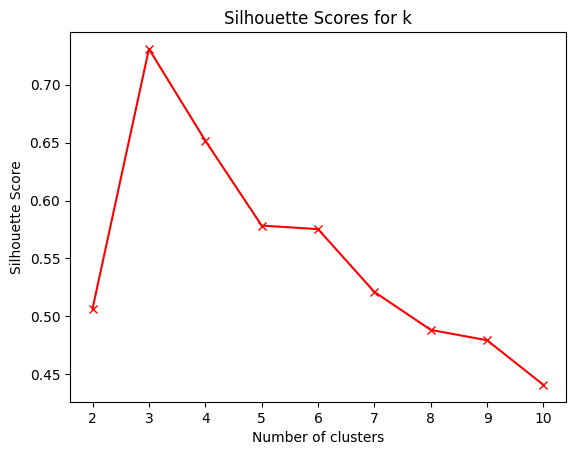

In [17]:
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
K = range(2, 11)  # Try between 2 and 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_transformed)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_transformed, kmeans.labels_))

# Plot elbow
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette scores
plt.figure()
plt.plot(K, sil_scores, 'rx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k')
plt.show()
